# **Natural Language Processing with Python**
by [CSpanias](https://cspanias.github.io/aboutme/) - 01/2022

Content based on the [NLTK book](https://www.nltk.org/book/). <br>

You can find Chapter 3 [here](https://www.nltk.org/book/ch03.html).

# CONTENT

1. Language Processing and Python
2. Accessing Text Corpora and Lexical Resources
3. [Processing Raw Text](#RawText)
    1. [Accessing Text from the Web and from Disk](#TextWebDisk)
        1. [Electronic Books](#Ebooks)
        2. [Dealing with HTML](#HTML)
        3. [Processing Search Engine Results](#SearchEngines)
        4. [Processing RSS Feeds](#RSS)
        5. [Reading Local Files](#Local)
        6. [Extracting Text from PDF, MSWord, and other Binary Formats](#PDF)
        7. [Capturing User Input](#UserInput)
        8. [The NLP Pipeline](#NLPPipeline)

**Install**, **import** and **download NLTK**. <br>

*Uncomment lines 2 and 5 if you haven't installed and downloaded NLTK yet.*

In [1]:
# install nltk
#!pip install nltk

# load nltk
import nltk

# download nltk
#nltk.download()

<a name="TextWebDisk"></a>
## 3.1 Accessing Text from the Web and from Disk
<a name="Ebooks"></a>
### 3.1.1 Electronic Books
1. [Get Text from a Website](#TextWeb)
2. [Convert to NLTK Text](#NLTKText)

<a name="TextWeb"></a>
#### Get Text from a Website
**`from urllib import request`**

We can easily access an **ASCII** text file hosted on the web.

In [35]:
from urllib import request

# text #2554 is Crime and Punishment (eng, ASCII)
url = "http://www.gutenberg.org/files/2554/2554-0.txt"

# request text
response = request.urlopen(url)

# get the raw content of the book
raw = response.read().decode('utf8')

# check data type
print("The data type is: {}.\n".format(type(raw)))

# check length
print("The length of the string is : {}.\n".format(len(raw)))

# check first 52 letters
print("The first 52 letters of the string are: \"{}\".\n".format(raw[:52]))

from nltk.tokenize import word_tokenize

# tokenize string
tokens = word_tokenize(raw)

# check first 10 tokens
print(tokens[:10])

The data type is: <class 'str'>.

The length of the string is : 1176812.

The first 52 letters of the string are: "﻿The Project Gutenberg eBook of Crime and Punishment".

['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'of', 'Crime', 'and', 'Punishment', ',', 'by']


<a name="NLTKText"></a>
#### Convert to NLTK Text
We can now create an **NLTK text** from this **list of tokens** and perform all **NLTK's operations**.

In [100]:
# create an NLTK text
text = nltk.Text(tokens)

# check data type
print("The data type is: {}.\n".format(type(text)))

# check last 10 words
print("The last 10 words are: {}.\n".format(text[-10:]))

def collocations_output(text):
    """Returns the output of a collocation in printed format."""
    return text.collocations()

# check collocations
print("The text's collocations are: {}".format(collocations_output(text)))

The data type is: <class 'nltk.text.Text'>.

The last 10 words are: ["''", 'Peppa', 'Pig', 'has', 'been', 'purged', "''", '(', '5/2/18', ')'].

tongue twister; nǎháng dōu; whichever job.; one would; gàn nǎháng;
he/she wants; every job; job means; one specific; specific job;
hángháng bùxíng; hángháng xíng; gàn yìháng; yìháng bùxíng; yìháng
xíng; whatever job; job he/she; one job
The text's collocations are: None


<a name="HTML"></a>
### 3.1.2 Dealing with HTML
**`from bs4 import BeautifulSoup`**

In [72]:
# get url address
url = "https://www.tapology.com/fightcenter/fighters/123989-giannis-basar"

# get content
html = request.urlopen(url).read().decode('utf8')

# check html content
print(html[:50], "\n")

from bs4 import BeautifulSoup

# remove HTML tags and get just the text
raw = BeautifulSoup(html, 'html.parser').get_text()

# tokenize text
tokens = word_tokenize(raw)

# check tokens
print(tokens[:20], "\n")

# remove stopwords
from nltk.corpus import stopwords
stop_words = nltk.corpus.stopwords.words('english')
tokens_stop = [token for token in tokens if token not in stop_words]
print(len(tokens_stop), "\n")

<!DOCTYPE html>
<html lang='en'>
<head>
<meta cont 

['Marcio', 'Borges', '|', 'MMA', 'Fighter', 'Page', '|', 'Tapology', 'menu', 'Lost', '/', 'Forgot', '?', 'FAQ', 'Register', 'Tap', 'In', 'Tapology', 'Search', 'Forum'] 

749 



<a name="SearchEnginges"></a>
### 3.1.3 Processing Search Engine Results

**Advantages**:
1. **Size**: since we are searching such a large set of documents, we are more likely to find any linguistic pattern we are interested in.
2. They are very **easy to use**.

**Shortcomings**:
1. The allowable range of **search patterns** is **severely restricted** (individual words or strings of words, sometimes with wildcards).
2. They give **inconsistent results**, and can give widely different figures when used at different times or in different geographical regions. When content has been duplicated across multiple sites, search results may be boosted. 
3. The **markup** in the result returned by a search engine **may change unpredictably**, breaking any pattern-based method of locating particular content (a problem which is ameliorated by the use of **search engine APIs**).

<a name="RSS"></a>
### 3.1.4 Processing RSS Feeds
**`import feedparser`**

We can access the content of a blog with the **Universal Feed Parser** library.

In [95]:
import feedparser

# instantiate feedparser
llog = feedparser.parse("http://languagelog.ldc.upenn.edu/nll/?feed=atom")

# print blog's title
print("The llog's title is: \"{}\".\n".format(llog['feed']['title']))

# check length
print("The llog's length is: {}.\n".format(len(llog.entries)))

# check a specific entry title
post = llog.entries[3]
print("The title of entry {} is: {}.\n".format(3, post.title))

# check entry content
content = post.content[0].value
print("Entry {}:\n{}\n".format(3, content[:200]))

# remove HTML tags
raw = BeautifulSoup(content, 'html.parser').get_text()

# tokenize text
tokens = word_tokenize(raw)

# check tokens
print("The first 20 tokens are:\n{}".format(tokens[:20]))

The llog's title is: "Language Log".

The llog's length is: 13.

The title of entry 3 is: Pinyin vs. characters.

Entry 3:
<p>From Dotno Pount:</p>
<p style="padding-left: 40px;">I received this poster in Chinese and thought you would enjoy it! It captures the Catch-22 of talents and careers very nicely, I think.</p>
<p a

The first 20 tokens are:
['From', 'Dotno', 'Pount', ':', 'I', 'received', 'this', 'poster', 'in', 'Chinese', 'and', 'thought', 'you', 'would', 'enjoy', 'it', '!', 'It', 'captures', 'the']


<a name="Local"></a>
### 3.1.5 Reading Local Files
**`open()`** <br>
**`read()`**

In [122]:
# check directory
import os
print(os.listdir('.'), "\n")

# open the file
f = open('molly.txt')

# access content
raw = f.read()

# check content
print("The content of the file is: \"{}\"\n".format(raw))

['.ipynb_checkpoints', 'chapter3-1_.ipynb', 'chapter3-1_AccessingText.ipynb', 'molly.txt'] 

The content of the file is: "hi python i am molly \n go to a new line \t tab spaced


Line 3
Line 4"



<a name="PDF"></a>
### 3.1.6 Extracting Text from PDF, MSWord, and other Binary Formats
**`pypdf`** <br>
**`pywin32`**

**ASCII** and **HTML** text are **human readable formats**. 

Text often comes in **binary formats** — like **PDF** and **MSWord** — that can only be opened using specialized software. Third-party libraries such as **`pypdf`** and **`pywin32`** provide access to these formats. 

For **once-off conversion of a few documents**, it is simpler to open the document with a suitable application, then save it as text to your local drive.

<a name="UserInput"></a>
### 3.1.7 Capturing User Input
**`input`**

In [128]:
# capture user input
s = input("Enter some text: ")

def count_letters(text):
    tokens = word_tokenize(text)
    token_count = len(tokens)
    
    letter_count = 0
    for token in tokens:
        letter_count += len(token)
        
    return token_count, letter_count

# print length of text
print("You typed {} tokens consisting of {} letters.".format(count_letters(s)[0], count_letters(s)[1]))

Enter some text: asd asd asd asd asd
You typed 5 tokens consisting of 15 letters.


<a name="NLPPipeline"></a>
### 3.1.8 The NLP Pipeline

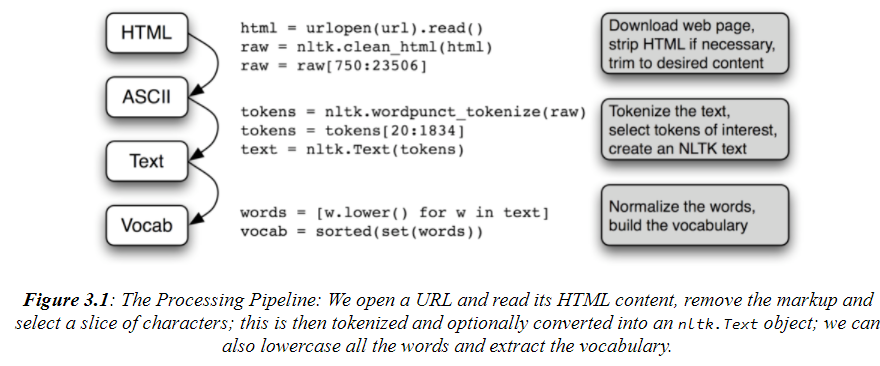